In [ ]:
import pandas as pd

# Load the data
file_path = 'Campaign_emails data.csv'
df = pd.read_csv(file_path)





In [ ]:
print(df.head())


                                         Name  \
0                  December 2023 Image Survey   
1             1 Custom Puzzle Gift Idea 12.06   
2  3 Artist of the Month: David MacLean 12.03   
3   14 Cyber Monday Last Chance 12.01 + SMS11   
4       13 Back in Stock Puzzles 11.30 + SMS8   

                       Subject Line                  Send Time Day of Send  \
0       Help us select NEW PUZZLES!  2023-12-07T17:00:00+00:00    Thursday   
1  Great Gift Idea: A Custom Puzzle  2023-12-06T21:00:00+00:00   Wednesday   
2      Meet Our Artist of the Month  2023-12-03T16:45:00+00:00      Sunday   
3           Cyber Week Last Chance!  2023-12-01T20:00:00+00:00      Friday   
4  Dozens of Puzzles Back in Stock!  2023-11-30T19:30:00+00:00    Thursday   

   Total Recipients  Open Rate  Click Rate  Placed Order Rate  \
0          133578.0      35.05        3.50               0.02   
1          194965.0      44.48        1.31               0.08   
2          197861.0      53.33        1.8

In [ ]:
print(df.columns.tolist())

['Name', 'Subject Line', 'Send Time', 'Day of Send', 'Total Recipients', 'Open Rate', 'Click Rate', 'Placed Order Rate', 'Email Body']


Derive
1. CTOR - Effectiveness of the body of the email
2. Conversion Rate - Effectiveness of the website

In [ ]:
# Add derived columns
df['ctor'] = df['Click Rate'] / df['Open Rate']
df['conversion_rate'] = df['Placed Order Rate'] / df['Click Rate']

# Show the first five rows of the updated DataFrame
df[['Click Rate', 'Open Rate', 'Placed Order Rate', 'ctor', 'conversion_rate']].head()


,Click Rate,Open Rate,Placed Order Rate,ctor,conversion_rate
0,3.50,35.05,0.02,0.099857,0.005714
1,1.31,44.48,0.08,0.029451,0.061069
2,1.82,53.33,0.19,0.034127,0.104396
3,0.90,42.69,0.23,0.021082,0.255556
4,2.12,52.04,0.28,0.040738,0.132075


Convert open rate from percentage to decimal

In [ ]:
# Divide Open Rate by 100 and update the column
df['Open Rate'] = df['Open Rate'] / 100

# Show the updated first five rows for confirmation
df[['Open Rate']].head()


,Open Rate
0,0.3505
1,0.4448
2,0.5333
3,0.4269
4,0.5204


FInd mean, median and quatile range to explore the data


In [ ]:
# Recalculate statistics for the updated Open Rate, as well as ctor and conversion_rate
mean_values = df[['Open Rate', 'ctor', 'conversion_rate']].mean()
median_values = df[['Open Rate', 'ctor', 'conversion_rate']].median()
percentiles_25 = df[['Open Rate', 'ctor', 'conversion_rate']].quantile(0.25)
percentiles_75 = df[['Open Rate', 'ctor', 'conversion_rate']].quantile(0.75)

# Combine all into a summary DataFrame
summary_updated = pd.DataFrame({
    'mean': mean_values,
    'median': median_values,
    '25th percentile': percentiles_25,
    '75th percentile': percentiles_75
})

summary_updated


,mean,median,25th percentile,75th percentile
Open Rate,0.462906,0.448300,0.425600,0.504300
ctor,0.066069,0.050346,0.035372,0.085083
conversion_rate,0.116446,0.096667,0.065517,0.155844


<ipython-input-10-e3964c683184>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['Send Date'].dt.to_period('M')


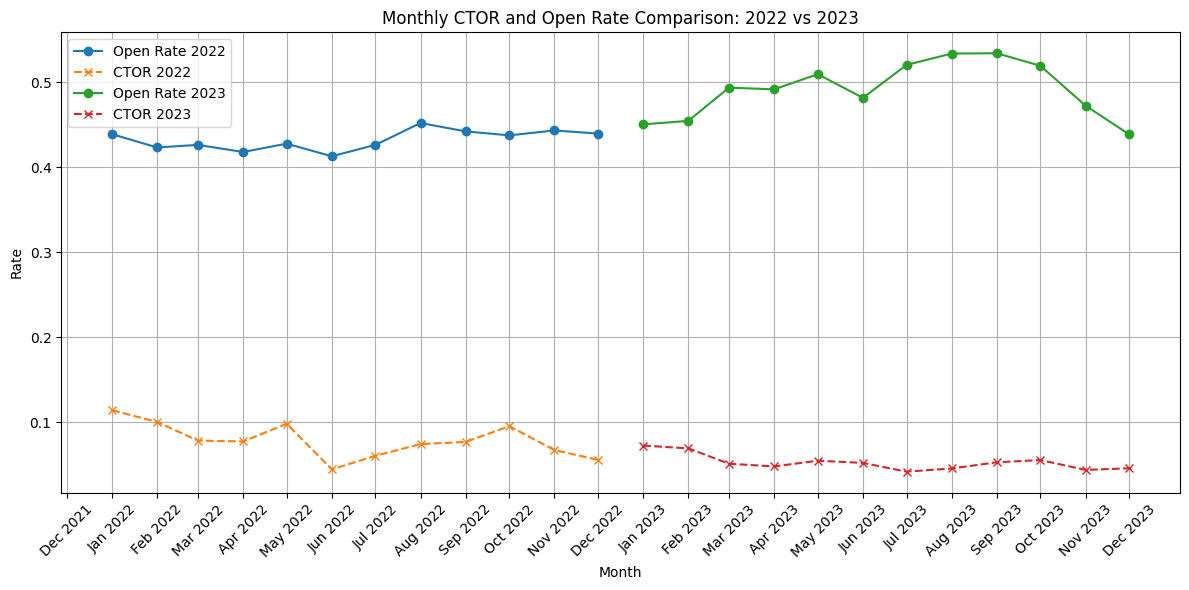

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ensure 'Send Date' is a datetime
df['Send Date'] = pd.to_datetime(df['Send Time'])

# 2. Extract Year and Month for grouping
df['YearMonth'] = df['Send Date'].dt.to_period('M')

# 3. Group by YearMonth, calculate mean (or median) for both metrics
monthly = df.groupby('YearMonth')[['ctor', 'Open Rate']].mean().reset_index()
monthly['YearMonth'] = monthly['YearMonth'].dt.to_timestamp()

# 4. Plot, with only one point per month
plt.figure(figsize=(12, 6))

# 2022 lines
plt.plot(monthly[monthly['YearMonth'].dt.year == 2022]['YearMonth'],
         monthly[monthly['YearMonth'].dt.year == 2022]['Open Rate'],
         marker='o', linestyle='-', label='Open Rate 2022')
plt.plot(monthly[monthly['YearMonth'].dt.year == 2022]['YearMonth'],
         monthly[monthly['YearMonth'].dt.year == 2022]['ctor'],
         marker='x', linestyle='--', label='CTOR 2022')

# 2023 lines
plt.plot(monthly[monthly['YearMonth'].dt.year == 2023]['YearMonth'],
         monthly[monthly['YearMonth'].dt.year == 2023]['Open Rate'],
         marker='o', linestyle='-', label='Open Rate 2023')
plt.plot(monthly[monthly['YearMonth'].dt.year == 2023]['YearMonth'],
         monthly[monthly['YearMonth'].dt.year == 2023]['ctor'],
         marker='x', linestyle='--', label='CTOR 2023')

plt.xlabel('Month')
plt.ylabel('Rate')
plt.title('Monthly CTOR and Open Rate Comparison: 2022 vs 2023')
plt.xticks(monthly['YearMonth'], monthly['YearMonth'].dt.strftime('%b %Y'), rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


heatmap and scatter plot of  top 25  percentile of open rate  vs day of the week ( also provide the color grading you are using )( darker it if the number of top 25 percentile increase in any day for heatmap) - This will give us the day on which the email is most open)

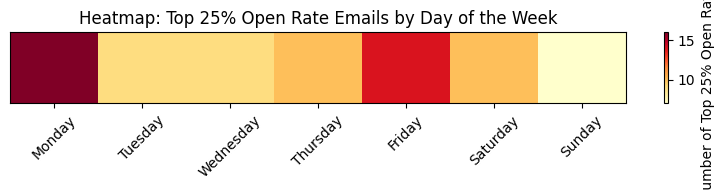

<ipython-input-45-3ec4fe59d6a3>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_df['Day Num'] = top_25_df['Day of Send'].map(day_map)


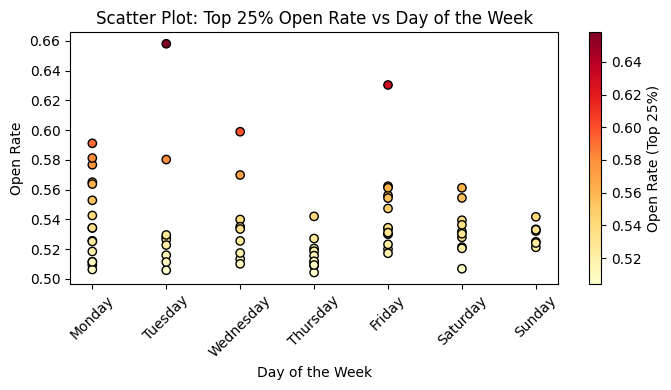

In [ ]:
import matplotlib.pyplot as plt

# Filter to top 25th percentile of Open Rate
open_rate_75th = df['Open Rate'].quantile(0.75)
top_25_df = df[df['Open Rate'] >= open_rate_75th]

# Count how many top 25 percentile emails per day of the week
day_counts = top_25_df['Day of Send'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0
)

# Heatmap data for counts
heatmap_data = day_counts.values.reshape(1, -1)

plt.figure(figsize=(8, 2))
# Using "YlOrRd" for color grading (Yellow-Orange-Red, where red = higher)
plt.imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Number of Top 25% Open Rate Emails')
plt.yticks([])
plt.xticks(range(len(day_counts.index)), day_counts.index, rotation=45)
plt.title('Heatmap: Top 25% Open Rate Emails by Day of the Week')
plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(7, 4))
# Map day of week to numbers for plotting
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}
top_25_df['Day Num'] = top_25_df['Day of Send'].map(day_map)

scatter = plt.scatter(top_25_df['Day Num'], top_25_df['Open Rate'],
                      c=top_25_df['Open Rate'], cmap='YlOrRd', edgecolor='k')
plt.xticks(list(day_map.values()), list(day_map.keys()), rotation=45)
plt.colorbar(scatter, label='Open Rate (Top 25%)')
plt.title('Scatter Plot: Top 25% Open Rate vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Open Rate')
plt.tight_layout()
plt.show()



Lets see the CTOR for the week

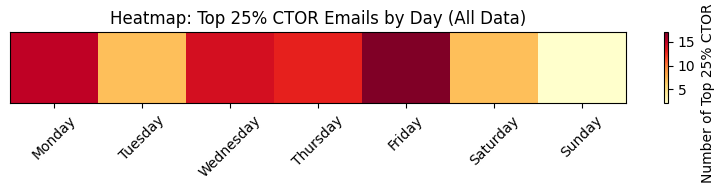

<ipython-input-46-0f1215f697a7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_ctor['Day Num'] = top_25_ctor['Day of Send'].map(day_map)


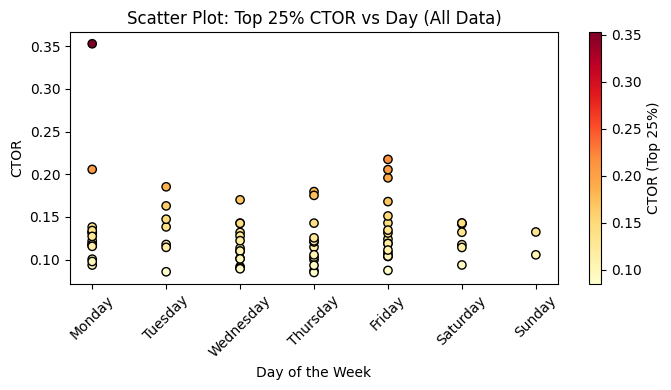

In [ ]:
# Top 25th percentile for ctor (for the whole data)
ctor_75th = df['ctor'].quantile(0.75)
top_25_ctor = df[df['ctor'] >= ctor_75th]


# Count by day of week for all data
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts_ctor = top_25_ctor['Day of Send'].value_counts().reindex(day_order, fill_value=0)
heatmap_data_ctor = day_counts_ctor.values.reshape(1, -1)

# Heatmap for top 25% CTOR (whole data)
plt.figure(figsize=(8, 2))
plt.imshow(heatmap_data_ctor, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Number of Top 25% CTOR Emails')
plt.yticks([])
plt.xticks(range(len(day_counts_ctor.index)), day_counts_ctor.index, rotation=45)
plt.title('Heatmap: Top 25% CTOR Emails by Day (All Data)')
plt.tight_layout()
plt.show()

# Scatter plot for all data, top 25% ctor only
top_25_ctor['Day Num'] = top_25_ctor['Day of Send'].map(day_map)

plt.figure(figsize=(7, 4))
scatter = plt.scatter(top_25_ctor['Day Num'], top_25_ctor['ctor'],
                      c=top_25_ctor['ctor'], cmap='YlOrRd', edgecolor='k')
plt.xticks(list(day_map.values()), list(day_map.keys()), rotation=45)
plt.colorbar(scatter, label='CTOR (Top 25%)')
plt.title('Scatter Plot: Top 25% CTOR vs Day (All Data)')
plt.xlabel('Day of the Week')
plt.ylabel('CTOR')
plt.tight_layout()
plt.show()



OR Time

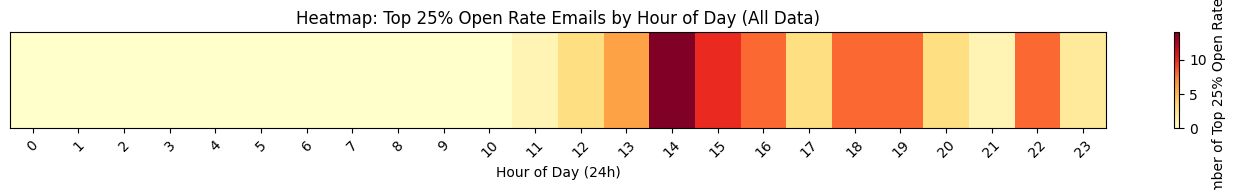

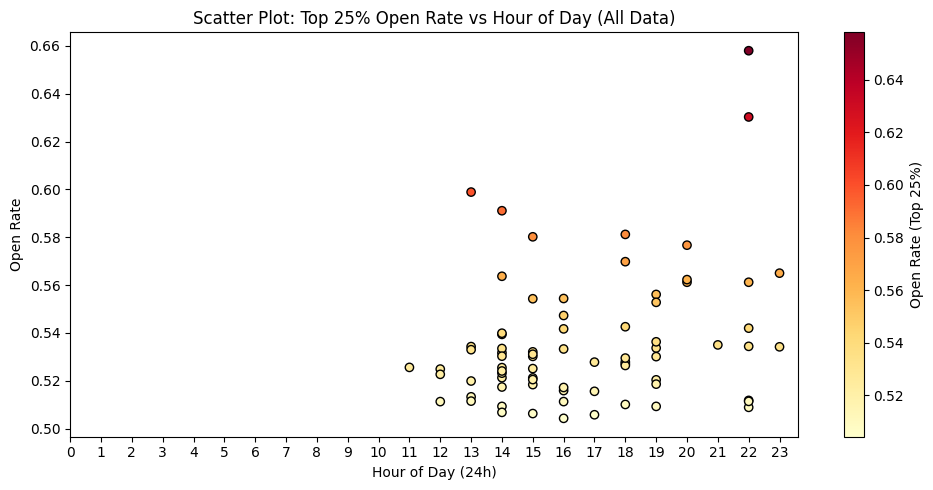

In [ ]:
# Extract hour from Send Time for time of day analysis
df['Send Hour'] = pd.to_datetime(df['Send Time']).dt.hour

# Top 25th percentile for Open Rate (whole data)
open_rate_75th = df['Open Rate'].quantile(0.75)
top_25_open = df[df['Open Rate'] >= open_rate_75th]

# Count by hour for top 25% open rate emails
hour_counts_open = top_25_open['Send Hour'].value_counts().sort_index()
hours = list(range(24))
hour_counts_open = hour_counts_open.reindex(hours, fill_value=0)
heatmap_data_open_hour = hour_counts_open.values.reshape(1, -1)

# Heatmap for top 25% Open Rate by hour
plt.figure(figsize=(14, 2))
plt.imshow(heatmap_data_open_hour, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Number of Top 25% Open Rate Emails')
plt.yticks([])
plt.xticks(range(24), range(24), rotation=45)
plt.title('Heatmap: Top 25% Open Rate Emails by Hour of Day (All Data)')
plt.xlabel('Hour of Day (24h)')
plt.tight_layout()
plt.show()

# Scatter plot for top 25% open rate by hour
plt.figure(figsize=(10, 5))
scatter = plt.scatter(top_25_open['Send Hour'], top_25_open['Open Rate'],
                      c=top_25_open['Open Rate'], cmap='YlOrRd', edgecolor='k')
plt.colorbar(scatter, label='Open Rate (Top 25%)')
plt.title('Scatter Plot: Top 25% Open Rate vs Hour of Day (All Data)')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Open Rate')
plt.xticks(range(24))
plt.tight_layout()
plt.show()



ctor time

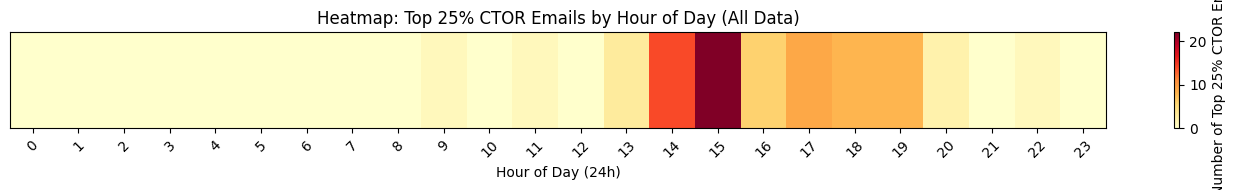

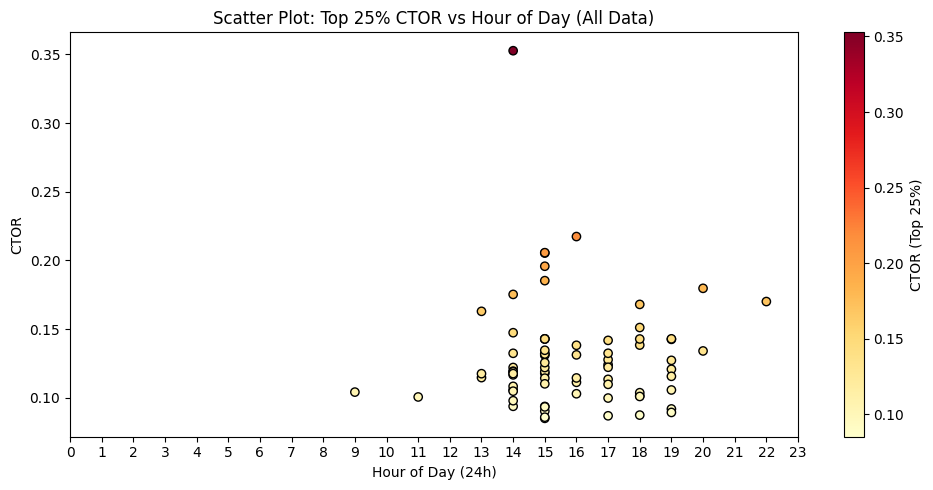

In [ ]:
# Top 25th percentile for CTOR (whole data)
ctor_75th = df['ctor'].quantile(0.75)
top_25_ctor = df[df['ctor'] >= ctor_75th]

# Count by hour for top 25% CTOR emails
hour_counts_ctor = top_25_ctor['Send Hour'].value_counts().sort_index()
hour_counts_ctor = hour_counts_ctor.reindex(hours, fill_value=0)
heatmap_data_ctor_hour = hour_counts_ctor.values.reshape(1, -1)

# Heatmap for top 25% CTOR by hour
plt.figure(figsize=(14, 2))
plt.imshow(heatmap_data_ctor_hour, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Number of Top 25% CTOR Emails')
plt.yticks([])
plt.xticks(range(24), range(24), rotation=45)
plt.title('Heatmap: Top 25% CTOR Emails by Hour of Day (All Data)')
plt.xlabel('Hour of Day (24h)')
plt.tight_layout()
plt.show()

# Scatter plot for top 25% CTOR by hour
plt.figure(figsize=(10, 5))
scatter = plt.scatter(top_25_ctor['Send Hour'], top_25_ctor['ctor'],
                      c=top_25_ctor['ctor'], cmap='YlOrRd', edgecolor='k')
plt.colorbar(scatter, label='CTOR (Top 25%)')
plt.title('Scatter Plot: Top 25% CTOR vs Hour of Day (All Data)')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('CTOR')
plt.xticks(range(24))
plt.tight_layout()
plt.show()



# **Great Campaigns overall**


Campaigns with great Subjects


In [ ]:
or_95 = df['Open Rate'].quantile(0.95)

# Get only the rows where Open Rate is in the top 5%
top_5_or = df[df['Open Rate'] >= or_95]

# Show up to 10 campaigns, all columns, formatted nicely as markdown
top_5_or_md = top_5_or.head(10).to_markdown(index=False)
print(top_5_or_md)

| Name                                             | Subject Line                           | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                         |      ctor |   conversion_rate |   Send Hour |
|:-------------------------------------------------|:---------------------------------------|:--------------------------|:--------------|-------------------:|------------:|-------------:|--------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------|----------:|------------------:|------------:|
| 9 Shop by Pieces 11.04                           | Shop by Piece Count                    | 2023-11-04T20:45:00+00:00 | Saturday      |             198595 |      0.5612 |         2.36 |   

In [ ]:
top_5_or.to_csv('top_5_percent_open_rate_campaigns.csv', index=False)

Campaign with great email body


In [ ]:
# Calculate the 95th percentile of ctor
ctor_95 = df['ctor'].quantile(0.95)

# Get only the rows where ctor is in the top 5%
top_5_ctor = df[df['ctor'] >= ctor_95]

# Show up to 10 campaigns, all columns, formatted nicely as markdown
top_5_ctor_md = top_5_ctor.head(10).to_markdown(index=False)
print(top_5_ctor_md)


| Name                                    | Subject Line                | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
top_5_ctor.to_csv('top_5_percent_ctor_campaigns.csv', index=False)

Overall great campaigns

In [ ]:
or_75 = df['Open Rate'].quantile(0.75)
ctor_75 = df['ctor'].quantile(0.75)

# Get top 5% rows
top_25 = df[(df['Open Rate'] >= or_75) & (df['ctor'] >= ctor_75)]

# Show up to 10 campaigns, all columns, formatted nicely
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 180)
print(top_25.head(10).to_markdown(index=False))

| Name                                                 | Subject Line                                         | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
top_25.to_csv('top_25_percent_or_and_ctor_campaigns.csv', index=False)

# **Worse Campaigns **

Overall worse campaign

In [ ]:
# Calculate the 10th percentile for CTOR and Open Rate using df
ctor_10th = df['ctor'].quantile(0.25)
or_10th = df['Open Rate'].quantile(0.25)

# Filter rows where both CTOR and Open Rate are in the bottom 10th percentile
low_perc_rows = df[(df['ctor'] <= ctor_10th) & (df['Open Rate'] <= or_10th)]

# Print all columns for these campaigns
print(low_perc_rows.to_markdown(index=False))


| Name                                                                        | Subject Line                                            | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                         |       ctor |   conversion_rate |
|:----------------------------------------------------------------------------|:--------------------------------------------------------|:--------------------------|:--------------|-------------------:|------------:|-------------:|--------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------|-----------:|------------------:|
| 12 Cyber Monday Today RESEND 11.27 + SMS9                                   | 🧩 Cyber Monday Savings!                         

In [ ]:
low_perc_rows.to_csv('Lowest_25_percentile.csv', index=False)

Worst Subject

In [ ]:
# Calculate the 10th percentile for Open Rate using df
or_5th = df['Open Rate'].quantile(0.05)

# Filter rows where Open Rate is in the bottom 10th percentile
low_or_rows = df[df['Open Rate'] <= or_5th]

# Print all columns for these campaigns
print(low_or_rows.to_markdown(index=False))


| Name                                                                        | Subject Line                              | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
low_or_rows.to_csv('Lowest_5_percentile_OR.csv', index=False)

Worst email body


In [ ]:
# Calculate the 5th percentile for CTOR using df
ctor_5th = df['ctor'].quantile(0.05)

# Filter rows where CTOR is in the bottom 5th percentile
low_ctor_rows = df[df['ctor'] <= ctor_5th]

# Print all columns for these campaigns
print(low_ctor_rows.to_markdown(index=False))


| Name                                                         | Subject Line                                                   | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                         |       ctor |   conversion_rate |
|:-------------------------------------------------------------|:---------------------------------------------------------------|:--------------------------|:--------------|-------------------:|------------:|-------------:|--------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------|-----------:|------------------:|
| 14 Cyber Monday Last Chance 12.01 + SMS11                    | Cyber Week Last Chance!                                        | 2023-12-01T20:

In [ ]:
low_ctor_rows.to_csv('Lowest_5_percentile_ctOR.csv', index=False)

# **january data analysis**

Top 25 percentile open rate

In [ ]:
df['Send Date'] = pd.to_datetime(df['Send Time']).dt.date

# Filter for January 2022 and January 2023
jan_data = df[
    ((df['Send Date'] >= pd.to_datetime('2022-01-01').date()) & (df['Send Date'] <= pd.to_datetime('2022-01-31').date())) |
    ((df['Send Date'] >= pd.to_datetime('2023-01-01').date()) & (df['Send Date'] <= pd.to_datetime('2023-01-31').date()))
]

# Calculate 75th percentile for Open Rate in this subset
open_rate_75th_overall = df['Open Rate'].quantile(0.75)

# Filter for rows with Open Rate in the top 25th percentile
top_25_open_jan = jan_data[jan_data['Open Rate'] >= open_rate_75th_overall]
top_25 = top_25_open_jan.head(10).to_markdown(index=False)
# Display the dates with top 25% Open Rate, sorted by date
top_25_open_dates = top_25_open_jan[['Send Date', 'Open Rate']].sort_values(['Send Date'])
print(top_25)

| Name                                     | Subject Line                                      | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                                                                                        |     ctor |   conversion_rate |   Send Hour | Send Date   |
|:-----------------------------------------|:--------------------------------------------------|:--------------------------|:--------------|-------------------:|------------:|-------------:|--------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------:|------------------:|------------:|:------------|
| 7 National Puzzle Day Promo La

 days in  January with worse open rate

In [ ]:
df['Send Date'] = pd.to_datetime(df['Send Time']).dt.date

# 2. Filter for January 2022 and January 2023
jan_2022 = df[(df['Send Date'] >= pd.to_datetime('2022-01-01').date()) &
              (df['Send Date'] <= pd.to_datetime('2022-01-31').date())]
jan_2023 = df[(df['Send Date'] >= pd.to_datetime('2023-01-01').date()) &
              (df['Send Date'] <= pd.to_datetime('2023-01-31').date())]

# 3. Calculate 25th percentile of Open Rate in the full dataset
or_25th = df['Open Rate'].quantile(0.25)

# 4. Get days (1-31) that are present in both years with OR in bottom 25%
days_2022 = set(pd.to_datetime(jan_2022[jan_2022['Open Rate'] <= or_25th]['Send Date']).dt.day)
days_2023 = set(pd.to_datetime(jan_2023[jan_2023['Open Rate'] <= or_25th]['Send Date']).dt.day)
common_days = sorted(days_2022 & days_2023)

# 5. Filter for rows in both years that are on common days with OR in bottom 25%
jan_2022_common = jan_2022[(pd.to_datetime(jan_2022['Send Date']).dt.day.isin(common_days)) & (jan_2022['Open Rate'] <= or_25th)]
jan_2023_common = jan_2023[(pd.to_datetime(jan_2023['Send Date']).dt.day.isin(common_days)) & (jan_2023['Open Rate'] <= or_25th)]

# 6. Concatenate and display the result
least_25_or_common = pd.concat([jan_2022_common, jan_2023_common]).sort_values('Send Date')
print(least_25_or_common.to_markdown(index=False))


| Name                                                | Subject Line                            | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                         | Send Date   |
|:----------------------------------------------------|:----------------------------------------|:--------------------------|:--------------|-------------------:|------------:|-------------:|--------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------|:------------|
| 3A/B Back in Stock Puzzles 1.11                     | Your favorites—back for a limited time! | 2022-01-11T16:30:00+00:00 | Tuesday       |             204272 |       42.01 |         4.81 |                0.31 | ['1 800 548 8009', 'White Mounta

Top 25 percentile CTOR rate

In [ ]:
# Filter data for January 2022 and January 2023
df['Send Date'] = pd.to_datetime(df['Send Time']).dt.date
jan_data = df[
    ((df['Send Date'] >= pd.to_datetime('2022-01-01').date()) & (df['Send Date'] <= pd.to_datetime('2022-01-31').date())) |
    ((df['Send Date'] >= pd.to_datetime('2023-01-01').date()) & (df['Send Date'] <= pd.to_datetime('2023-01-31').date()))
]

ctor_75th_overall = df['ctor'].quantile(0.75)
top_25_ctor_jan = jan_data[jan_data['ctor'] >= ctor_75th_overall]

# List the dates with top 25% CTOR in January (both years)
top_25_dates = top_25_ctor_jan[['Send Date', 'ctor']].sort_values(['Send Date'])

top_25 = top_25_ctor_jan.head(10).to_markdown(index=False)
print(top_25)


| Name                                                                                | Subject Line                                    | Send Time                 | Day of Send   |   Total Recipients |   Open Rate |   Click Rate |   Placed Order Rate | Email Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Days with least ctos ( in least 25 percentile)

In [ ]:
import pandas as pd

# 1. Ensure Send Date column exists
df['Send Date'] = pd.to_datetime(df['Send Time']).dt.date

# 2. Filter for January 2022 and January 2023
jan_2022 = df[(df['Send Date'] >= pd.to_datetime('2022-01-01').date()) &
              (df['Send Date'] <= pd.to_datetime('2022-01-31').date())]
jan_2023 = df[(df['Send Date'] >= pd.to_datetime('2023-01-01').date()) &
              (df['Send Date'] <= pd.to_datetime('2023-01-31').date())]

# 3. Calculate 25th percentile of CTOR in the full dataset
ctor_25th = df['ctor'].quantile(0.25)

# 4. Get days (1-31) that are present in both years with CTOR in bottom 25%
days_2022 = set(pd.to_datetime(jan_2022[jan_2022['ctor'] <= ctor_25th]['Send Date']).dt.day)
days_2023 = set(pd.to_datetime(jan_2023[jan_2023['ctor'] <= ctor_25th]['Send Date']).dt.day)
common_days = sorted(days_2022 & days_2023)

# 5. Filter for rows in both years that are on common days with CTOR in bottom 25%
jan_2022_common = jan_2022[(pd.to_datetime(jan_2022['Send Date']).dt.day.isin(common_days)) & (jan_2022['ctor'] <= ctor_25th)]
jan_2023_common = jan_2023[(pd.to_datetime(jan_2023['Send Date']).dt.day.isin(common_days)) & (jan_2023['ctor'] <= ctor_25th)]

# 6. Concatenate and display the result
least_25_ctor_common = pd.concat([jan_2022_common, jan_2023_common]).sort_values('Send Date')
print(least_25_ctor_common.to_markdown(index=False))


| Name   | Subject Line   | Send Time   | Day of Send   | Total Recipients   | Open Rate   | Click Rate   | Placed Order Rate   | Email Body   | ctor   | conversion_rate   | Send Hour   | Send Date   |
|--------|----------------|-------------|---------------|--------------------|-------------|--------------|---------------------|--------------|--------|-------------------|-------------|-------------|
